# Adtracking Fraud Detection

by Kyle O'Brien, Catherine Lee, Amit Saxena 

Data is in "data/" and includes the training and testing csv files.
Evaluation metrics will include looking at R^2 and a confusion matrix. Other things to try, CNN (Resnet, inceptionv3)

In [2]:
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf
import keras

Using TensorFlow backend.


Train_sample: 100,000 randomly-selected rows of training data (because the full training data takes too long)

In [3]:
#load data in 

data = pd.read_csv("data/equalized_train.csv")

data.head()


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83252,3,1,16,379,2017-11-06 15:42:19,NaN,0
1,106590,3,1,25,379,2017-11-06 15:43:23,NaN,0
2,147164,14,1,28,134,2017-11-06 16:00:00,NaN,0
3,39782,2,1,10,205,2017-11-06 16:00:00,NaN,0
4,121646,23,1,13,153,2017-11-06 16:00:00,NaN,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91473 entries, 0 to 91472
Data columns (total 8 columns):
ip                 91473 non-null int64
app                91473 non-null int64
device             91473 non-null int64
os                 91473 non-null int64
channel            91473 non-null int64
click_time         91473 non-null object
attributed_time    41473 non-null object
is_attributed      91473 non-null int64
dtypes: int64(6), object(2)
memory usage: 5.6+ MB


Dropping attributed_time because many null values

# Feature Engineering for Date and Time

In [5]:
#separate click_time into multiple columns
#data['click_time'].split(" ")


# Understanding our Dataset

In [6]:
#data = data.drop(columns=['attributed_time'])
#data.info()

In [7]:
data['is_attributed'].describe()

count    91473.000000
mean         0.453391
std          0.497826
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_attributed, dtype: float64

In [8]:
#plotx = data['attributed_time']
#ploty = data['is_attributed']

#plt.scatter(plotx,ploty)
import pandas
class_counts = data.groupby('is_attributed').size()
print(class_counts)

is_attributed
0    50000
1    41473
dtype: int64


This confirms that we have a major imbalance in our data. This is incentivising our model to guess 0 for overthing and it would still receive a 99% accuracy

# Logistic Regression

In [9]:
X = data[['app', 'device', 'os', 'channel']]
y = data['is_attributed']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
X_train.head()

,app,device,os,channel
22243,2,1,20,477
58933,105,1,17,451
50574,18,3032,607,107
63812,11,1,13,325
52847,116,1,41,101


In [12]:
y_train.head()

22243    0
58933    1
50574    0
63812    1
52847    1
Name: is_attributed, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [14]:
logreg.fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predictions = logreg.predict(X_test)

Seems a little strange that we would get such high accuracy. This might have to do with the fact that we are using R^2 to measure the goodness of our model. There might be an imbalance in the test set of which clicks are 0 or 1, so we should try precision and recall. (Longterm with full training data, try to keep an equal number of classes)

In [16]:
logreg_score = logreg.score(X_test, y_test)
print("Logistic Regression Accuracy", logreg_score)

Logistic Regression Accuracy 0.6349822355834928


# Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)
rf_score = RandomForest.score(X_test,y_test)
print("Random Forest accuracy:", rf_score)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest accuracy: 0.9352282044274391


In [18]:
# Precision Recall Score
from sklearn.metrics import classification_report

y_pred = RandomForest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9971
           1       0.96      0.89      0.93      8324

   micro avg       0.94      0.94      0.94     18295
   macro avg       0.94      0.93      0.93     18295
weighted avg       0.94      0.94      0.93     18295



# Support Vector Machine

In [19]:
from sklearn.svm import LinearSVC 

In [20]:
lSVC = LinearSVC()

In [21]:
lSVC.fit(X_train,y_train)
svm_score = lSVC.score(X_test,y_test)
print("SVM accuracy:", svm_score)

SVM accuracy: 0.7056572834107679


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree

In [22]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

dtc = dtc.fit(X_train,y_train)
dtc_score =  dtc.score(X_test,y_test)
print("Decision Tree Accuracy:", dtc_score)

Decision Tree Accuracy: 0.93517354468434


In [23]:
# Precision Recall Score
from sklearn.metrics import classification_report

y_pred = dtc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9971
           1       0.96      0.89      0.93      8324

   micro avg       0.94      0.94      0.94     18295
   macro avg       0.94      0.93      0.93     18295
weighted avg       0.94      0.94      0.93     18295



In [24]:
# Confusion Matrix

#In Progress

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
#plt.title("Confusion Matrix")

#plt.colorbar()
#tick_marks = np.arange(2)


[[9690  281]
 [ 905 7419]]


# KNN

In [25]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)


# Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_score = gaussian.score(X_test, y_test) 

# SGD

In [27]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd_score = sgd.score(X_test, y_test) 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


# Perceptron

In [28]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
perc_score = perceptron.score(X_test, y_test)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


# XGBoost

In [29]:
import xgboost as xgb

XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
Y_pred = XGB.predict(X_test)
XGB_score = XGB.score(X_test,y_test)

# Which model do we use?

In [30]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree', 'K Nearest Neighbors', 
              'Gaussian Naive Bayes', 'Stochastic Gradient Descent', 
              'Perceptron'],
    'Score': [svm_score, logreg_score, rf_score, svm_score, dtc_score, 
              knn_score, gaussian_score, sgd_score, perc_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.935228
4,Decision Tree,0.935174
5,K Nearest Neighbors,0.921235
0,Support Vector Machines,0.705657
3,Linear SVC,0.705657
6,Gaussian Naive Bayes,0.688385
7,Stochastic Gradient Descent,0.685051
1,Logistic Regression,0.634982
8,Perceptron,0.612845


# Neural Network

In [37]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(60, activation='sigmoid', input_dim = 4))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


# can try rmsprop
model.compile(optimizer = 'adam',     
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) 

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, y_train, 
                    validation_split = 0.33, 
                    epochs = 300, 
                    batch_size = 32)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)


print('Training set accuracy:', train_acc)
print('Training set loss:', train_loss)

print('Test set accuracy:', test_acc)
print('Test set loss:', test_loss)



Train on 49029 samples, validate on 24149 samples
Epoch 1/300
49029/49029 [==============================] - 4s 91us/step - loss: 0.5191 - acc: 0.7534 - val_loss: 0.4505 - val_acc: 0.8090
Epoch 2/300
49029/49029 [==============================] - 4s 79us/step - loss: 0.4160 - acc: 0.8412 - val_loss: 0.3846 - val_acc: 0.8580
Epoch 3/300
49029/49029 [==============================] - 4s 80us/step - loss: 0.3772 - acc: 0.8650 - val_loss: 0.3601 - val_acc: 0.8699
Epoch 4/300
49029/49029 [==============================] - 4s 80us/step - loss: 0.3597 - acc: 0.8666 - val_loss: 0.3451 - val_acc: 0.8718
Epoch 5/300
49029/49029 [==============================] - 4s 73us/step - loss: 0.3475 - acc: 0.8712 - val_loss: 0.3358 - val_acc: 0.8743
Epoch 6/300
49029/49029 [==============================] - 4s 73us/step - loss: 0.3415 - acc: 0.8748 - val_loss: 0.3331 - val_acc: 0.8776
Epoch 7/300
49029/49029 [==============================] - 4s 76us/step - loss: 0.3348 - acc: 0.8778 - val_loss: 0.3236 - 

Epoch 118/300
49029/49029 [==============================] - 4s 78us/step - loss: 0.2488 - acc: 0.9107 - val_loss: 0.2475 - val_acc: 0.9125
Epoch 119/300
49029/49029 [==============================] - 5s 92us/step - loss: 0.2483 - acc: 0.9107 - val_loss: 0.2445 - val_acc: 0.9139
Epoch 120/300
49029/49029 [==============================] - 5s 98us/step - loss: 0.2483 - acc: 0.9107 - val_loss: 0.2417 - val_acc: 0.9117
Epoch 121/300
49029/49029 [==============================] - 4s 84us/step - loss: 0.2480 - acc: 0.9114 - val_loss: 0.2478 - val_acc: 0.9109
Epoch 122/300
49029/49029 [==============================] - 4s 74us/step - loss: 0.2481 - acc: 0.9108 - val_loss: 0.2420 - val_acc: 0.9143
Epoch 123/300
49029/49029 [==============================] - 4s 91us/step - loss: 0.2471 - acc: 0.9114 - val_loss: 0.2416 - val_acc: 0.9113
Epoch 124/300
49029/49029 [==============================] - 5s 107us/step - loss: 0.2464 - acc: 0.9114 - val_loss: 0.2447 - val_acc: 0.9133
Epoch 125/300
49029

49029/49029 [==============================] - 3s 64us/step - loss: 0.2372 - acc: 0.9133 - val_loss: 0.2360 - val_acc: 0.9174
Epoch 235/300
49029/49029 [==============================] - 3s 65us/step - loss: 0.2367 - acc: 0.9132 - val_loss: 0.2365 - val_acc: 0.9147
Epoch 236/300
49029/49029 [==============================] - 3s 63us/step - loss: 0.2377 - acc: 0.9134 - val_loss: 0.2338 - val_acc: 0.9147
Epoch 237/300
49029/49029 [==============================] - 3s 63us/step - loss: 0.2369 - acc: 0.9141 - val_loss: 0.2351 - val_acc: 0.9146
Epoch 238/300
49029/49029 [==============================] - 3s 64us/step - loss: 0.2367 - acc: 0.9138 - val_loss: 0.2413 - val_acc: 0.9110
Epoch 239/300
49029/49029 [==============================] - 3s 64us/step - loss: 0.2369 - acc: 0.9128 - val_loss: 0.2327 - val_acc: 0.9155
Epoch 240/300
49029/49029 [==============================] - 3s 64us/step - loss: 0.2361 - acc: 0.9138 - val_loss: 0.2359 - val_acc: 0.9152
Epoch 241/300
49029/49029 [=======

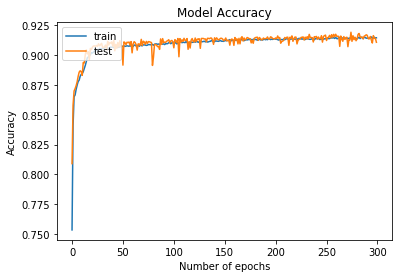

In [66]:
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

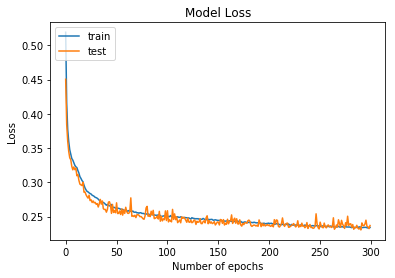

In [67]:
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Ensemble Learning

# Results on Test.csv

In [ ]:
import pandas as pd
true_test = pd.read_csv("data/test.csv")

#also remember to pickle model for kyle

In [ ]:
test.info()

In [ ]:
# Using Decision Tree

from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
print("Decision Tree Accuracy:", dtc_score)

true_test_X = true_test[['app', 'device', 'os', 'channel']]

true_test_predictions = dtc.predict(true_test_X)

In [ ]:
submission = pd.DataFrame({
        "ID": true_test["click_id"],
        "is_attributed": true_test_predictions
    })
# submission.to_csv('../output/submission.csv', index=False)